# Indicateurs d'intégrité
     
## Présentation
Ce document identifie les points de recharge du jeu de données IRVE présentant des problèmes d'intégrité.

```{admonition} Exemple
- une station associée à plusieurs coordonnées différentes
- une coordonnée associée à plusieurs adresses
```

In [1]:
import sys
from pathlib import Path
package = Path.cwd().parent.parent
try:
    import sources
except:
    sys.path.append(str(package))
from sources import indic_integrite

data = str(package / 'data')

In [2]:
indic = indic_integrite.indicateurs(data)

## Evolution des doublons
Le graphe ci-dessous présente l'évolution du nombre de points de recharge documentés dans le jeu de données avec une distinction entre les données présentant ou non des doublons (doublon : plusieurs point de recharge avec le même identifiant).      
       
Le nombre de doublons était très important avant l'été 2023 (plus de 40%). Les travaux menés pendant l'été ont permis de ramener le nombre de doulons à 5%.

On note néanmoins une remontée depuis la fin 2023 qui a été réduite mais reste encore significative (10 %).

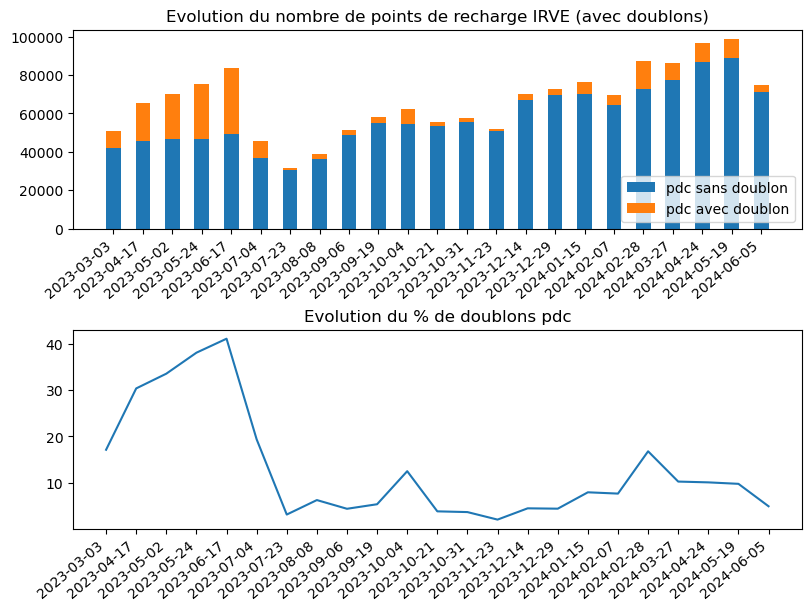

In [3]:
indic_integrite.doublons(indic)

## Evolution des données (hors doublons)
Le graphe ci-dessous présente l'évolution du nombre de points de recharge documentés dans le jeu de données avec une distinction entre les données présentant ou non des défauts d'intégrité.      

Le nombre de points de recharge est passé de 40 000 en début d'année 2023 à 89 000 en mai 2024 malgré une diminution pendant l'été 2023 (passage de 45 000 à moins de 30 000) résorbée ensuite.
On observe depuis fin novembre 2023 une forte augmentation du nombre de point de recharge (6 000 par mois alors qu'elle était avant cette date de 1 000 par mois).

Il est à noter que malgré la structure complexe du jeu de données IRVE, le taux de défaut a pu rester majoritairement à un niveau faible ( < 5% ). 
Le mauvais niveau de qualité des données ajoutées après l'été a dégradé le niveau de qualité (le taux de défaut a atteint 15% en septembre).
Une évolution apportée en avril 2024 a également conduit à un doublement du nombre de défauts. 
Ces difficultés ont pu être traitées dans les semaines qui ont suivi.

Le nombre de défauts pourrait être fortement réduit en traitant les cinq écarts présentés dans la suite de ce Notebook.

Nota :
- les défauts signalés concernant l'Eure ont été traités
- les défauts signalés concernant e-vadea ont été traités
- les défauts signalés concernant Ouest-charge ont été traités
- les défauts signalés concernant Freshmile ont été traités
- les défauts signalés concernant Power Dot ont été traités

pdc valide :  67566
pdc defaut :  3574


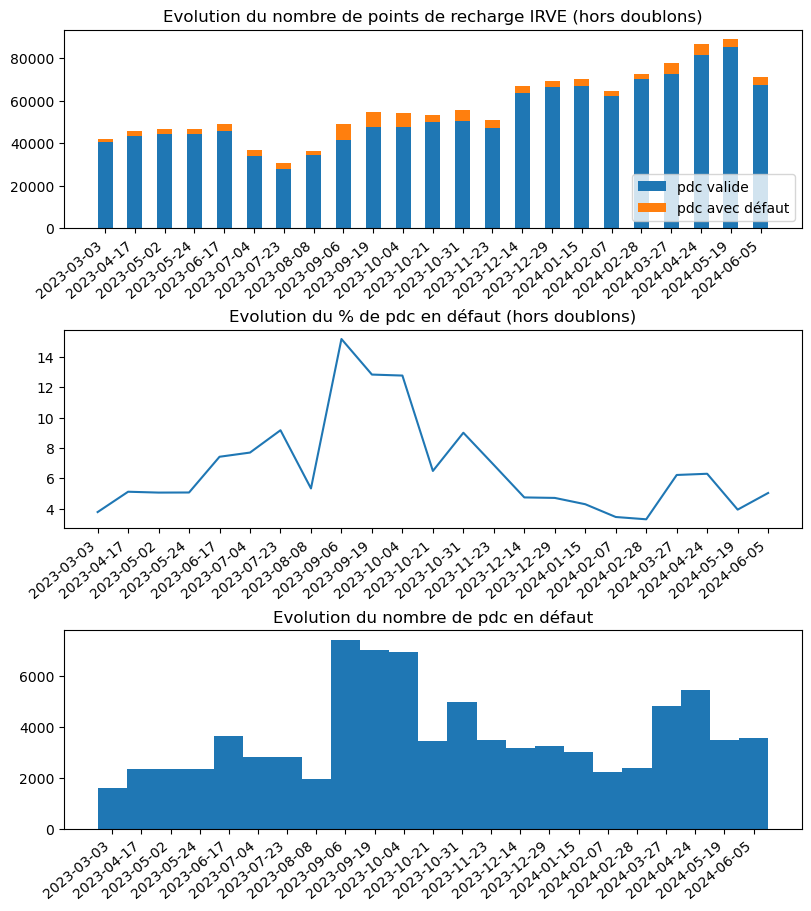

In [4]:
indic_integrite.evolution(indic)

## Défaut d'intégrité
Les défauts d'intégrité découlent du [modèle de données](http://nbviewer.org/github/loco-philippe/Environmental-Sensing/tree/main/python/Validation/irve/Analyse/IRVE_modele.ipynb) associé au jeu de données : 
- défauts liés aux relations entre entités :
    - Un pdc est unique et associé à une ligne du jeu de données
    - Un pdc est intégré dans une et une seule station
    - Une station est opérée par un et un seul opérateur
    - Une station est hébergée par une et une seule enseigne
    - Une station a une et une seule localisation
- défauts liés entre un attribut et une entité :
    - Une station a un et un seul “nom_station”
    - Une station a une et une seule “implantation_station”
    - Une station a un et un seul “nbre_pdc”
    - Une station a un et un seule “condition_accès”
    - Une station a un et un seul “horaires”
    - Une station a un et un seul “station_deux_roues”
    - Une localisation correspond à une et une seule “adresse_station”

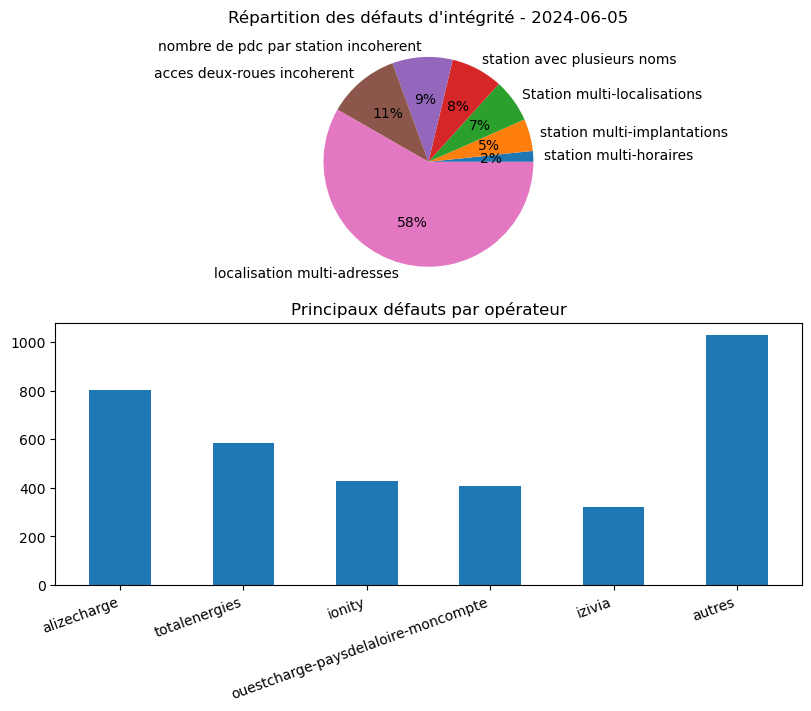

In [5]:
date = indic_integrite.defaut_integrite(indic)

## Localisation des stations comportant un écart

### icones de la carte
icones rouge : stations avec un écart de relations entre entités (voir introduction)     
icones orange : stations avec un défaut d'attributs (voir introduction)     

### indicateurs de défauts
Les libellés en fin de fenêtres contextuelles "champ 1 - champ 2 : False" signifient que 
le champ 2 est associé à plusieurs champ 1 en fonction des pdc (défaut d'intégrité).       
       
*Par exemple : "coordonneesXY - id_station_itinerance : False" signifie qu'il existe plusieurs pdc 
avec une même la valeur du champ "id_station_itinerance" mais plusieurs valeurs du champ "coordonnéesXY".*
   
**Nota :** 
- La carte est également accessible et partageable (fichier 'irve.html' présent sur le repository)
- les libellés de défaut sont identiques à ceux du fichier des écarts.


In [6]:
indic_integrite.defaut_carte(date, data).show('irve.html')